In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%pylab inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 8

ts = pd.read_csv("assignment.csv", parse_dates=['date'], index_col="date")
ts = ts.sort_index()

Populating the interactive namespace from numpy and matplotlib


In [24]:
ts.columns

Index(['daily worker count'], dtype='object')

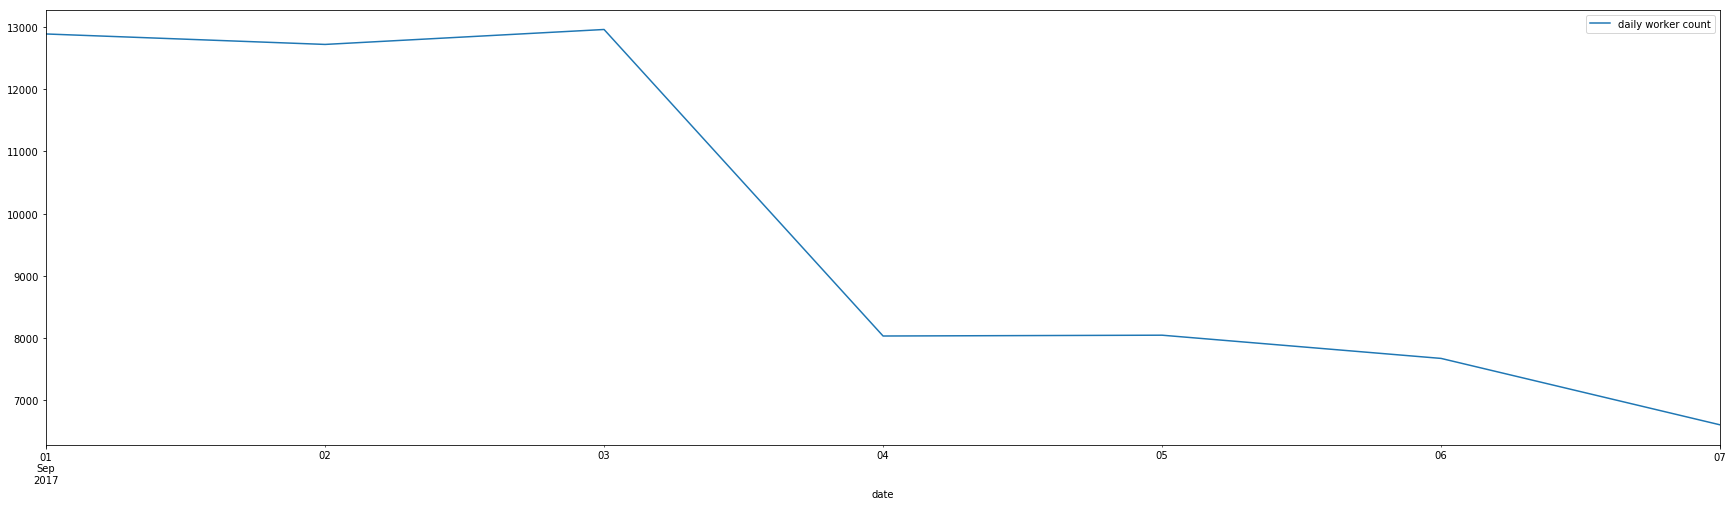

In [21]:
ts['2017-09'].plot()

In [22]:
from pandas.core import datetools
from statsmodels.tsa import stattools

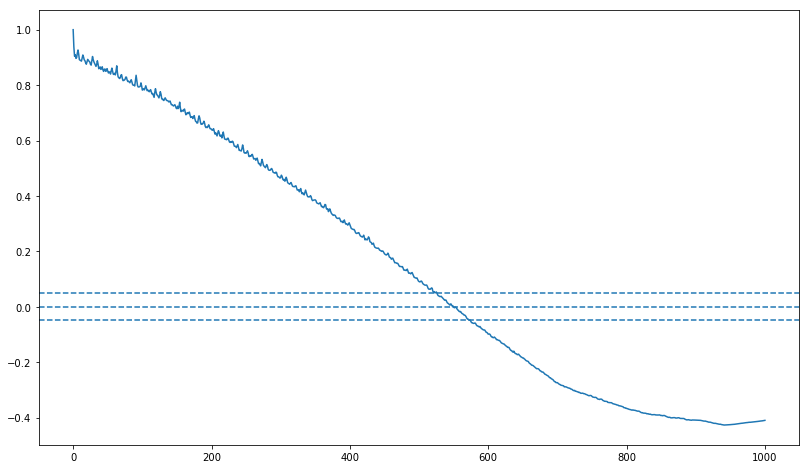

In [26]:
acf_result = stattools.acf(ts['daily worker count'], nlags=1000)
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(ts['daily worker count'])), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(ts['daily worker count'])), linestyle='--')

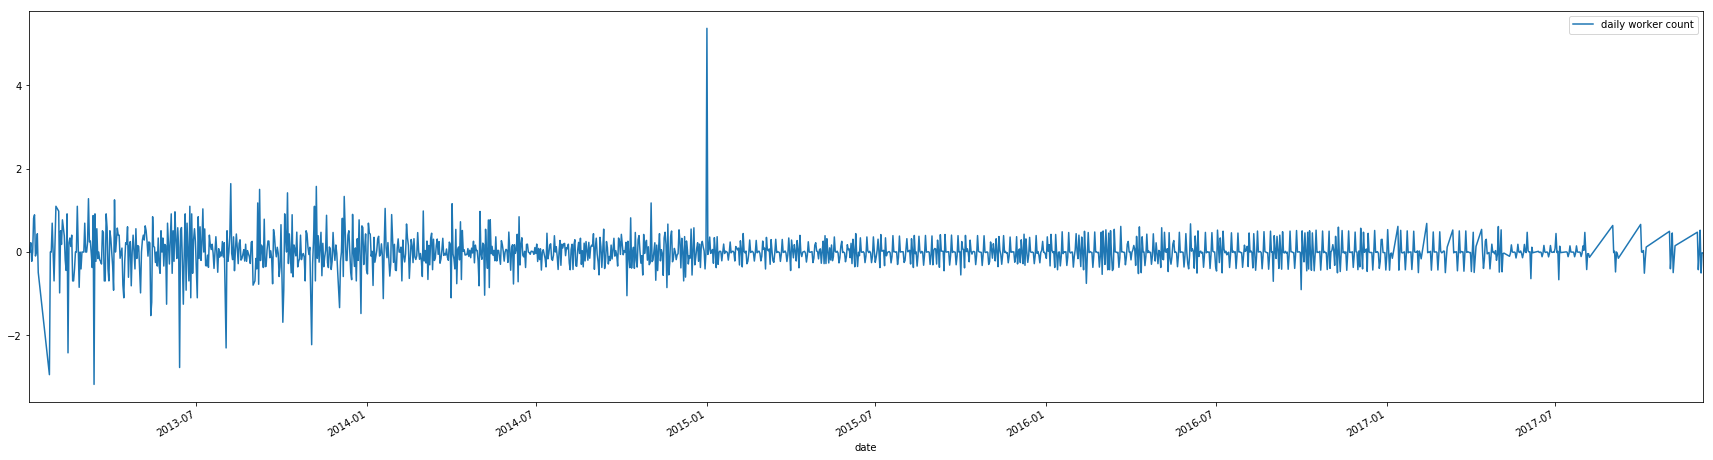

In [38]:
log_ts = np.log(ts)
log_ts_diff = log_ts - log_ts.shift()
log_ts_diff.plot()

In [39]:
log_ts_diff = log_ts_diff['daily worker count']
log_ts_diff.dropna(inplace=True)

In [40]:
log_ts_diff

date
2013-01-03    0.000000
2013-01-04    0.223144
2013-01-05   -0.223144
2013-01-06    0.000000
2013-01-07    0.810930
2013-01-08    0.893818
2013-01-09   -0.095310
2013-01-10    0.000000
2013-01-11    0.438255
2013-01-12   -0.489548
2013-01-24   -2.944439
2013-01-25    0.000000
2013-01-26    0.000000
2013-01-27    0.693147
2013-01-29   -0.693147
2013-01-31    1.098612
2013-02-03    0.980829
2013-02-04   -0.980829
2013-02-05    0.510826
2013-02-06    0.182322
2013-02-07    0.773190
2013-02-08    0.570545
2013-02-09    0.390866
2013-02-10   -0.194156
2013-02-11   -0.441833
2013-02-12    0.916291
2013-02-13   -2.420368
2013-02-14    0.223144
2013-02-15    0.336472
2013-02-16    0.133531
                ...   
2017-08-06   -0.040936
2017-08-07   -0.126423
2017-09-01    0.637533
2017-09-02   -0.013122
2017-09-03    0.018694
2017-09-04   -0.477984
2017-09-05    0.001617
2017-09-06   -0.047455
2017-09-07   -0.149687
2017-10-01    0.663193
2017-10-02   -0.000078
2017-10-03   -0.002733
2017-1

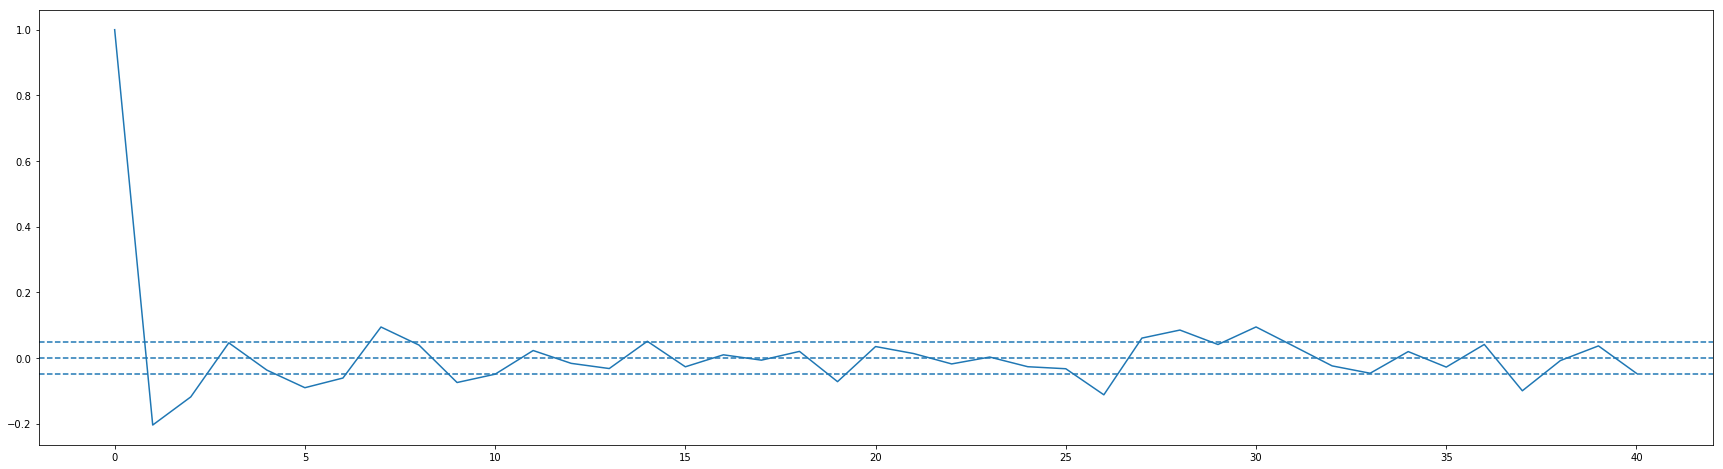

In [41]:
acf_result = stattools.acf(log_ts_diff)
plt.plot(acf_result)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_ts_diff)), linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_ts_diff)), linestyle='--')

# Preprediction Munging

In [ ]:
dataframe = dataframe.sort_index()
dataframe['year'] = dataframe.index.year
dataframe['day_of_month'] = dataframe.index.day
dataframe['month'] = dataframe.index.month
dataframe['day_of_week'] = dataframe.index.dayofweek
dataframe['quarter'] = dataframe.index.quarter
dataframe['week_of_year'] = dataframe.index.weekofyear

is_weekend = []
for i in dataframe.day_of_week:
    if i >= 5:
        is_weekend.append(1)
    else:
        is_weekend.append(0)
        
dataframe['is_weekend'] = is_weekend